* https://pypi.org/project/python-coinmarketcap/
* https://github.com/rsz44/python-coinmarketcap
* https://www.youtube.com/watch?v=uatXdBQ78AE
* https://medium.com/zengo/dune-analytics-introduction-tutorial-with-examples-d2c764600d6
* https://defillama.com/

* https://dune.xyz/shadow/Olympus-(OHM)
* https://dune.xyz/Cujowolf/Klima-DAO
* https://nomics.com/assets/ohm-olympus/history/3

In [1]:
import numpy as np
import pandas as pd
import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
superscript_map = {"ic": "ᶦᶜ", "mc": "ᵐᶜ",
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴", "5": "⁵", "6": "⁶",
    "7": "⁷", "8": "⁸", "9": "⁹", "a": "ᵃ", "b": "ᵇ", "c": "ᶜ", "d": "ᵈ",
    "e": "ᵉ", "f": "ᶠ", "g": "ᵍ", "h": "ʰ", "i": "ᶦ", "j": "ʲ", "k": "ᵏ",
    "l": "ˡ", "m": "ᵐ", "n": "ⁿ", "o": "ᵒ", "p": "ᵖ", "q": "۹", "r": "ʳ",
    "s": "ˢ", "t": "ᵗ", "u": "ᵘ", "v": "ᵛ", "w": "ʷ", "x": "ˣ", "y": "ʸ",
    "z": "ᶻ", "A": "ᴬ", "B": "ᴮ", "C": "ᶜ", "D": "ᴰ", "E": "ᴱ", "F": "ᶠ",
    "G": "ᴳ", "H": "ᴴ", "I": "ᴵ", "J": "ᴶ", "K": "ᴷ", "L": "ᴸ", "M": "ᴹ",
    "N": "ᴺ", "O": "ᴼ", "P": "ᴾ", "Q": "Q", "R": "ᴿ", "S": "ˢ", "T": "ᵀ",
    "U": "ᵁ", "V": "ⱽ", "W": "ᵂ", "X": "ˣ", "Y": "ʸ", "Z": "ᶻ", "+": "⁺",
    "-": "⁻", "=": "⁼", "(": "⁽", ")": "⁾"}

In [3]:
def formatDates(arr,date_format="%Y-%m-%d %H:%M"):
    return [datetime.datetime.strptime(d, date_format) for d in arr]

def stripCharacter(arr,c,r=''):
    return [e.replace(c, r) for e in arr]

def str2Float(arr):
    return [float(e) for e in arr]

def getDate(t, strt_date):
    return datetime.datetime.strptime(strt_date, "%Y-%m-%d") + datetime.timedelta(days=t) 

In [4]:
eth_price = pd.read_csv('../resources/eth_daily.csv')
eth_price = eth_price.assign(time = stripCharacter(eth_price['time'].values,'/','-'))
eth_price = eth_price.assign(time = formatDates(eth_price['time'].values,date_format="%m-%d-%Y"))
for colnm in eth_price.columns[1:]:
    arr = np.array(stripCharacter(eth_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'B'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    eth_price[colnm] = arr
eth_price = eth_price.sort_values(by='time')
eth_price.reset_index(drop=True, inplace=True)

In [5]:
btc_price = pd.read_csv('../resources/btc_daily.csv')
btc_price = btc_price.assign(time = stripCharacter(btc_price['time'].values,'/','-'))
btc_price = btc_price.assign(time = formatDates(btc_price['time'].values,date_format="%m-%d-%Y"))
for colnm in btc_price.columns[1:]:
    arr = np.array(stripCharacter(btc_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'B'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    btc_price[colnm] = arr
btc_price = btc_price.sort_values(by='time')
btc_price.reset_index(drop=True, inplace=True)

In [6]:
daily_price = pd.read_csv('../resources/daily_price.csv')
daily_price = daily_price.assign(time = stripCharacter(daily_price['time'].values,'/','-'))
daily_price = daily_price.assign(time = formatDates(daily_price['time'].values,date_format="%m-%d-%Y"))
for colnm in daily_price.columns[1:]:
    arr = np.array(stripCharacter(daily_price[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,'M'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    daily_price[colnm] = arr
daily_price = daily_price.sort_values(by='time')
daily_price.reset_index(drop=True, inplace=True)

In [7]:
apy = pd.read_csv('../resources/apy.csv')
apy = apy.assign(time = formatDates(apy['time'].values))
apy = apy.assign(rebase = stripCharacter(apy['rebase'].values,'%'))
apy = apy.assign(apy = stripCharacter(apy['apy'].values,'%'))
apy = apy.assign(rebase = str2Float(apy['rebase'].values))
apy = apy.assign(apy = str2Float(apy['apy'].values))
apy = apy.sort_values(by='time')

In [8]:
holders = pd.read_csv('../resources/holders.csv')
holders = holders.assign(time = formatDates(holders['time'].values))
holders = holders.sort_values(by='time')

In [9]:
market_cap = pd.read_csv('../resources/market_cap.csv')
market_cap = market_cap.assign(time = formatDates(market_cap['time'].values))
market_cap = market_cap.sort_values(by='time')

In [10]:
SRT_DATE = datetime.datetime(2021, 3, 23)
END_DATE = datetime.datetime(2021, 11, 12)

df_market_cap = market_cap.loc[market_cap['time'] >= SRT_DATE]
df_market_cap = df_market_cap.loc[market_cap['time'] <= END_DATE]
df_market_cap.reset_index(drop=True, inplace=True)
df_daily_price = daily_price.loc[daily_price['time'] >= SRT_DATE]
df_daily_price = df_daily_price.loc[daily_price['time'] <= END_DATE]
df_daily_price.reset_index(drop=True, inplace=True)

supply = df_market_cap['market_cap'].values/df_daily_price['close'].values
ohm_supply = df_daily_price
ohm_supply = ohm_supply.assign(market_cap = df_market_cap['market_cap'].values)
ohm_supply = ohm_supply.assign(supply = supply)
ohm_supply = ohm_supply.drop(columns=['volume'])

In [11]:
market_value_treasury = pd.read_csv('../resources/market_value_treasury.csv')
market_value_treasury = market_value_treasury.assign(time = formatDates(market_value_treasury['time'].values))
for colnm in market_value_treasury.columns[1:]:
    arr = np.array(stripCharacter(market_value_treasury[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    market_value_treasury[colnm] = arr
market_value_treasury = market_value_treasury.sort_values(by='time')  

In [12]:
ohm_treasury = pd.read_csv('../resources/ohm_treasury.csv')
ohm_treasury = ohm_treasury.assign(time = formatDates(ohm_treasury['time'].values))
for colnm in ohm_treasury.columns[1:]:
    arr = np.array(stripCharacter(ohm_treasury[colnm].values,'$'))
    arr = np.array(stripCharacter(arr,','))
    arr = str2Float(arr)
    ohm_treasury[colnm] = arr
ohm_treasury = ohm_treasury.sort_values(by='time')    

In [13]:
risk_free_value = pd.read_csv('../resources/risk_free_value.csv')
risk_free_value = risk_free_value.assign(time = formatDates(risk_free_value['time'].values))
risk_free_value = risk_free_value.sort_values(by='time')     

In [14]:
stake_ratio = pd.read_csv('../resources/stake_ratio.csv')
stake_ratio = stake_ratio.assign(time = formatDates(stake_ratio['time'].values))
stake_ratio = stake_ratio.sort_values(by='time')  

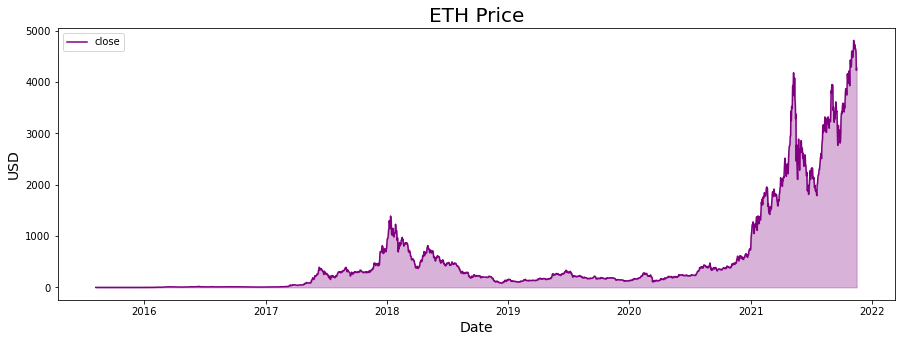

In [15]:
df = eth_price
colnms = df.columns[4:5]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('ETH Price', fontsize=20)
plt.legend()

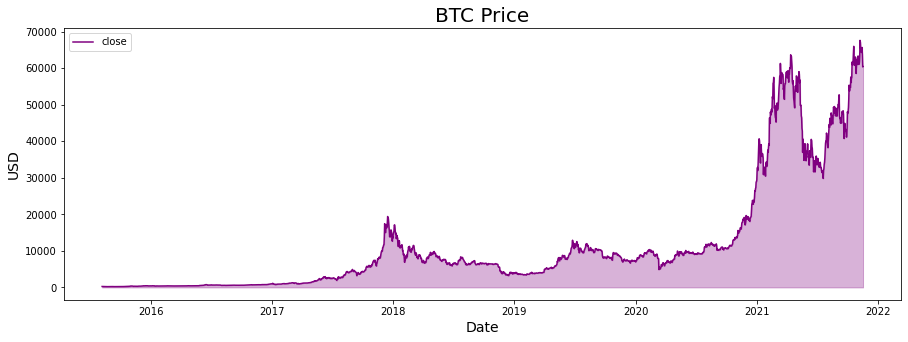

In [16]:
df = btc_price
colnms = df.columns[4:5]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('BTC Price', fontsize=20)
plt.legend()

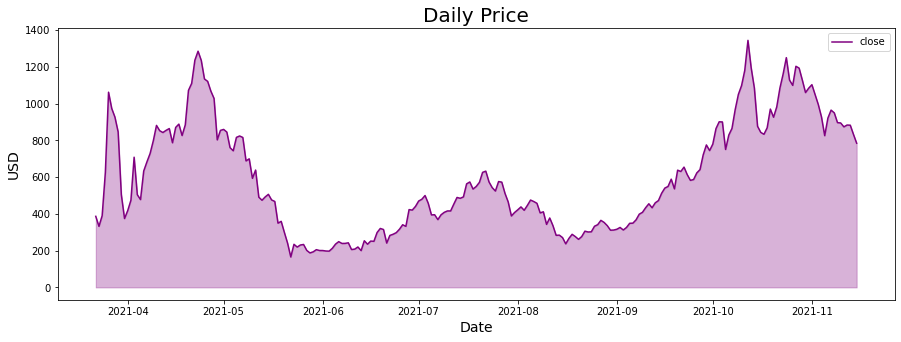

In [17]:
df = daily_price
colnms = df.columns[4:5]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Daily Price', fontsize=20)
plt.legend()

In [18]:
market_cap.tail(3)

,time,market_cap
2,2021-11-10,3.728882e+09
1,2021-11-11,3.679713e+09
0,2021-11-12,3.761966e+09


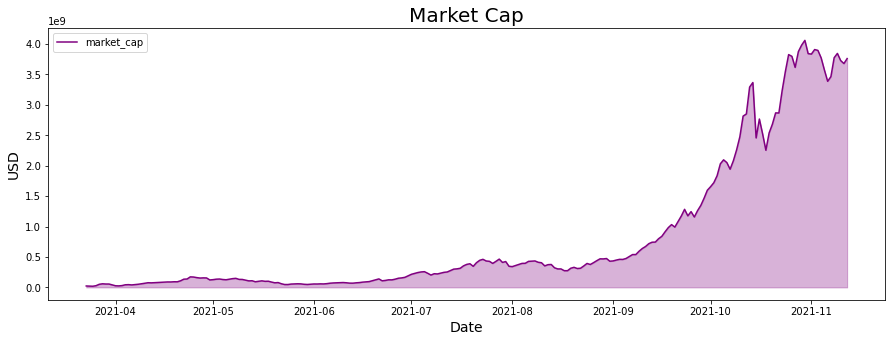

In [19]:
df = market_cap
colnms = df.columns[1:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Market Cap', fontsize=20)
plt.legend()

In [20]:
ohm_supply.tail(3)

,time,open,high,low,close,market_cap,supply
232,2021-11-10,897.52,927.44,872.85,894.71,3.728882e+09,4.167699e+06
233,2021-11-11,889.59,928.64,865.96,873.59,3.679713e+09,4.212174e+06
234,2021-11-12,874.53,903.13,865.79,883.39,3.761966e+09,4.258556e+06


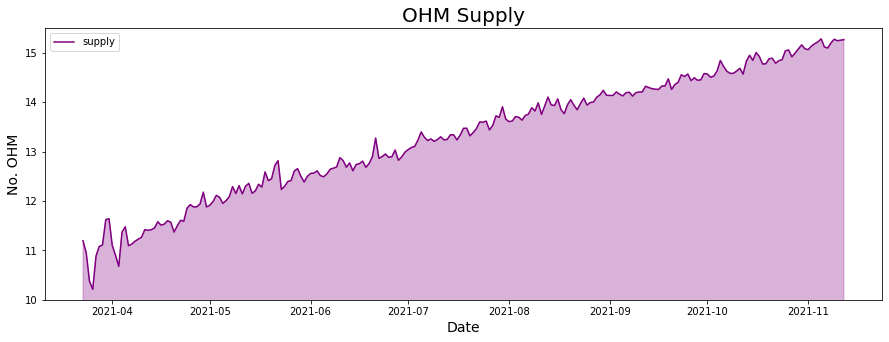

In [21]:
df = ohm_supply
colnms = df.columns[6:7]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + np.log(df[colnms[k]].values)
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. OHM', fontsize=14)
plt.title('OHM Supply', fontsize=20)
plt.ylim([10, 15.5])
plt.legend()

In [22]:
import statsmodels.api as sm

N = len(ohm_supply)
Np = 365

from statsmodels.stats.outliers_influence import summary_table
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np
import random

y = np.log(ohm_supply['supply'].values)
#x = np.log(np.array(range(1,len(y)+1)))
x = np.array(range(1,len(y)+1))

X = sm.add_constant(x)
regr = sm.OLS(y, X)
fit = regr.fit()
y_hat = fit.fittedvalues
prstd, y_hat_lwr, y_hat_upr = wls_prediction_std(fit)

st, data, ss2 = summary_table(fit, alpha=0.05)

#x_new = np.log(np.array(range(N,N+Np)))
x_new = np.array(range(N,N+Np))
X_p = sm.add_constant(x_new)
pred = fit.get_prediction(X_p)

dates = ohm_supply['time'].values
dates_pred = [getDate(t,strt_date='2021-11-12') for t in range(0,Np)]

y_pred = pred.predicted_mean
y_pred_lwr = y_pred - 1.96*prstd[0]
y_pred_upr = y_pred + 1.96*prstd[0]

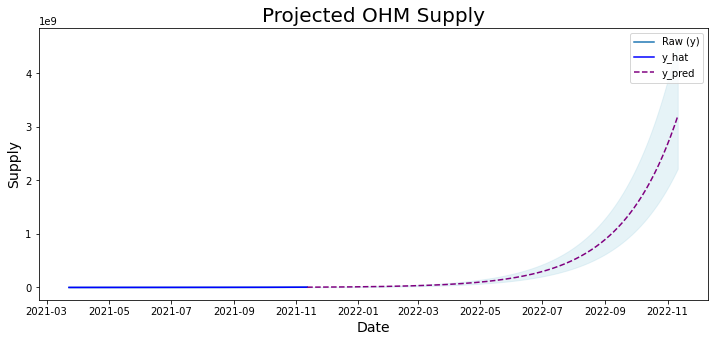

In [23]:
x = np.array(range(1,len(y)+1))
x_pred = np.array(range(2061,2061+N))

fig = plt.figure(figsize=(12,5))
ax = fig.gca()
plt.plot(dates, np.exp(y), label="Raw (y)")
plt.plot(dates, np.exp(y_hat), color='blue', label="y_hat")
plt.fill_between(dates, np.exp(y_hat_lwr), np.exp(y_hat_upr), alpha=0.3, color='lightblue')

plt.plot(dates_pred, np.exp(y_pred), color='purple', linestyle='dashed', label="y_pred")
plt.fill_between(dates_pred, np.exp(y_pred_lwr), np.exp(y_pred_upr), alpha=0.3, color='lightblue')
plt.title("Projected OHM Supply", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Supply", fontsize=14)
plt.legend();

In [24]:
market_value_treasury.head(3)

,time,treasury_mv,xsushi_mv,weth_mv,lusd_mv,frax_mv,dai_mv
138,2021-06-27,28403169.0,0.0,0.0,0.0,3105946.0,25297223.0
137,2021-06-28,28717591.0,0.0,0.0,0.0,3424527.0,25293063.0
136,2021-06-29,30391353.0,0.0,0.0,0.0,3869200.0,26522153.0


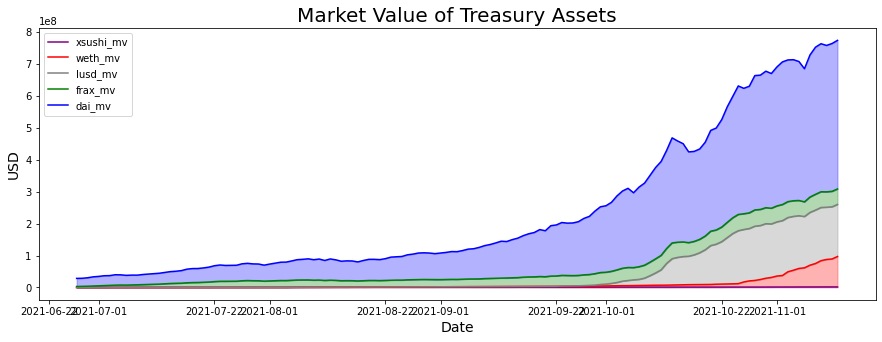

In [25]:
df = market_value_treasury
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Market Value of Treasury Assets', fontsize=20)
plt.legend()

In [26]:
risk_free_value.head(3)

,time,treasury_rfv,lusd_rfv,frax_rfv,dai_rfv
234,2021-03-23,68260,0,0,68260
233,2021-03-24,68260,0,0,68260
232,2021-03-25,68963,0,0,68963


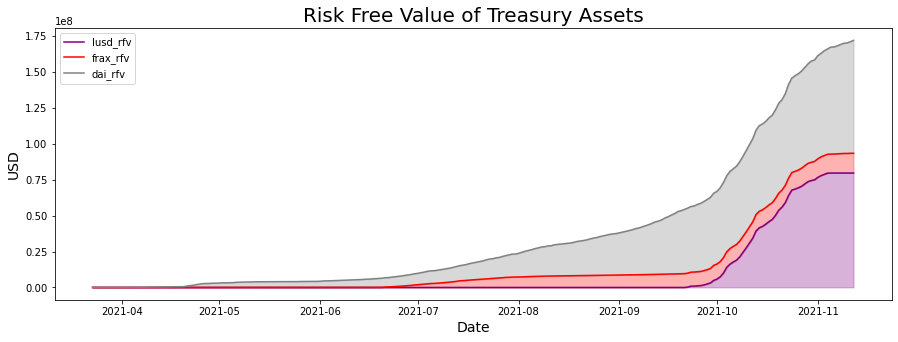

In [27]:
df = risk_free_value
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Risk Free Value of Treasury Assets', fontsize=20)
plt.legend()

In [28]:
stake_ratio.head(3)

,time,ohm_staked,ohm_not_staked
235,2021-03-22,0.000000,68260.000000
234,2021-03-23,22286.945160,36231.072818
233,2021-03-24,29634.045029,29007.752948


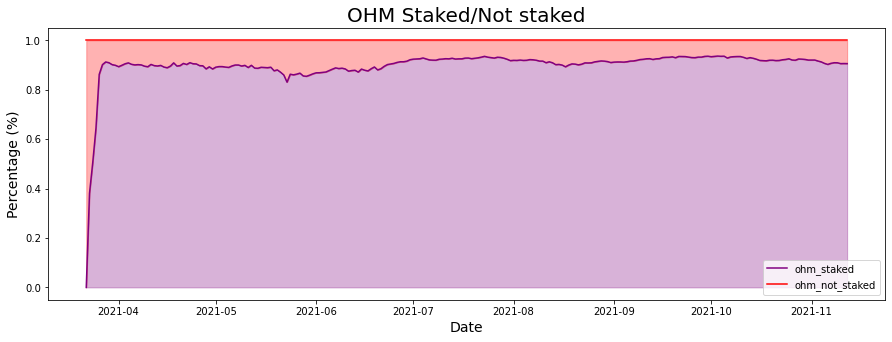

In [29]:
df = stake_ratio
colnms = df.columns[1:]
rsums = df[df.columns[1:]].sum(axis=1)
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values/rsums
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.title('OHM Staked/Not staked', fontsize=20)
plt.legend()  

In [30]:
holders.head(3)

,time,ohm_holders,s_ohm_holders,homies
238,2021-03-22,2,1,3
237,2021-03-23,539,258,797
236,2021-03-24,481,356,837


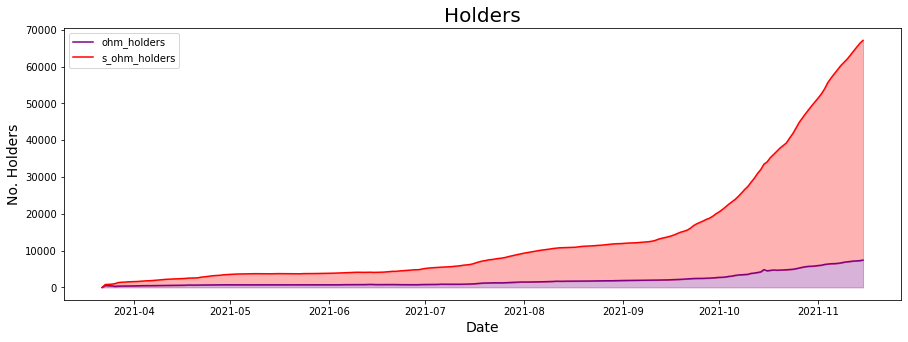

In [31]:
df = holders
colnms = df.columns[1:3]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + df[colnms[k]].values
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. Holders', fontsize=14)
plt.title('Holders', fontsize=20)
plt.legend()

In [32]:
apy.head(3)

,time,rebase,apy
0,2021-06-16 04:34:00,0.72,249393.92
1,2021-06-16 13:19:00,0.73,293349.04
2,2021-06-16 22:02:00,0.73,280163.19


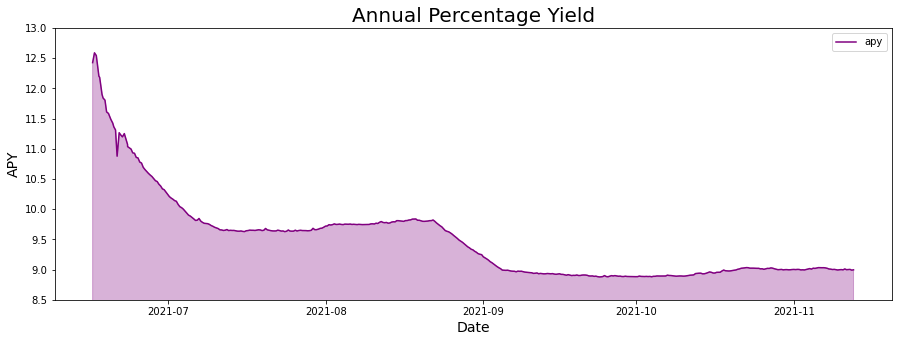

In [33]:
df = apy
colnms = df.columns[2:]
colors = ['purple','red','grey','green','blue']
fig = plt.figure(figsize=(15, 5))
dates = df['time'].values
aggr = np.zeros(len(df))
for k in range(len(colnms)):  
    prev_aggr = aggr
    aggr = aggr + np.log(df[colnms[k]].values)
    plt.plot(dates, aggr, label=colnms[k],color=colors[k])      
    plt.fill_between(dates, prev_aggr, aggr, alpha=0.3, color=colors[k])
plt.xlabel('Date', fontsize=14)
plt.ylabel('APY', fontsize=14)
plt.title('Annual Percentage Yield', fontsize=20)
plt.ylim([8.5, 13])
plt.legend()

In [34]:
btc_price.head(3)

,time,open,high,low,close,volume
0,2015-08-08,261.98,268.37,260.97,266.09,23.30
1,2015-08-09,266.40,268.69,262.66,265.01,15.90
2,2015-08-10,265.35,272.79,264.92,272.04,18.23


In [35]:
eth_price.head(3)

,time,open,high,low,close,volume
0,2015-08-08,0.66,0.88,0.57,0.77,3285.0
1,2015-08-09,0.77,0.82,0.64,0.75,6474.0
2,2015-08-10,0.76,1.12,0.65,1.08,38766.0


In [36]:
BTC_HALVENING_2016 = datetime.datetime(2016, 7, 9)
BTC_HALVENING_2020 = datetime.datetime(2020, 5, 11)

ETH_MC_2016 = 5870000
BTC_MC_2016 = 114140000
COMB_MC_2016 = ETH_MC_2016 + BTC_MC_2016
COMB_SQRTMC_2016 = ETH_MC_2016**0.5 + BTC_MC_2016**0.5
ETH_MC_2020 = 15440000000
BTC_MC_2020 = 119760000000
COMB_MC_2020 = ETH_MC_2020 + BTC_MC_2020
COMB_SQRTMC_2020 = ETH_MC_2020**0.5 + BTC_MC_2020**0.5

#eth_price = eth_price.loc[eth_price['time'] >= BTC_HALVENING_2016]
#btc_price = btc_price.loc[btc_price['time'] >= BTC_HALVENING_2016]
eth_price = eth_price.loc[eth_price['time'] >= BTC_HALVENING_2020]
btc_price = btc_price.loc[btc_price['time'] >= BTC_HALVENING_2020]

bot = np.zeros(len(eth_price))
dates = eth_price['time'].values
eth_close = eth_price['close'].values
btc_close = btc_price['close'].values

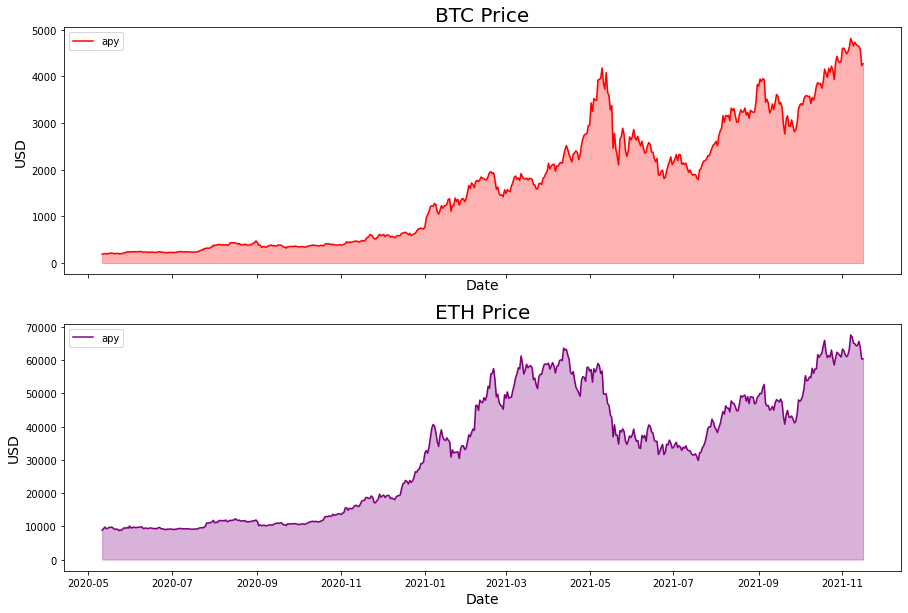

In [37]:
fig, (eth_ax, btc_ax) = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(15, 10))

btc_ax.plot(dates, btc_close, label=colnms[k],color='purple')      
btc_ax.fill_between(dates, bot, btc_close, alpha=0.3, color='purple')
btc_ax.set_xlabel('Date', fontsize=14)
btc_ax.set_ylabel('USD', fontsize=14)
btc_ax.set_title('ETH Price', fontsize=20)
btc_ax.legend()

eth_ax.plot(dates, eth_close, label=colnms[k],color='red')      
eth_ax.fill_between(dates, bot, eth_close, alpha=0.3, color='red')
eth_ax.set_xlabel('Date', fontsize=14)
eth_ax.set_ylabel('USD', fontsize=14)
eth_ax.set_title('BTC Price', fontsize=20)
eth_ax.legend()

In [38]:
#INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020))

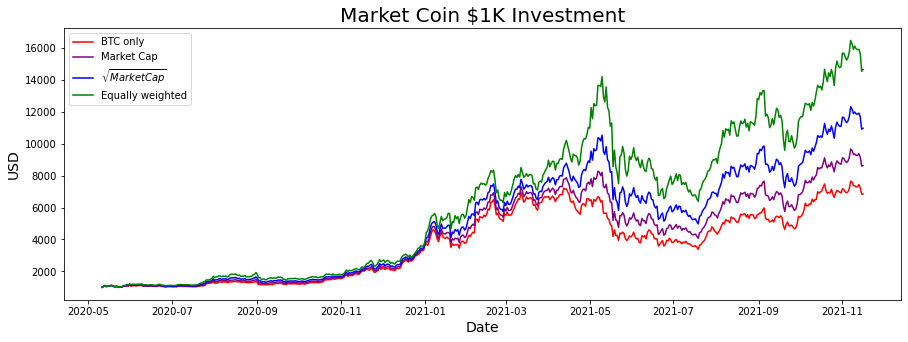

In [39]:
INVESTMENT = 1000

NBTC = INVESTMENT/btc_price['close'].values[0]
NETH = INVESTMENT/eth_price['close'].values[0]
btc_investment = NBTC*btc_price['close'].values
eth_investment = NETH*eth_price['close'].values

# Market Cap Weighted
NETH_MC = INVESTMENT*ETH_MC_2020/(COMB_MC_2020*eth_price['close'].values[0])
NBTC_MC = INVESTMENT*BTC_MC_2020/(COMB_MC_2020*btc_price['close'].values[0])
mc_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

# SQRT Market Cap Weighted
NETH_MC = INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020)*eth_price['close'].values[0])
NBTC_MC = INVESTMENT*(BTC_MC_2020**0.5)/((COMB_SQRTMC_2020)*btc_price['close'].values[0])
sqrt_mc_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

# 50/50 Weighted
NETH_MC = INVESTMENT/(2*eth_price['close'].values[0])
NBTC_MC = INVESTMENT/(2*btc_price['close'].values[0])
hh_investment = NBTC_MC*btc_price['close'].values + NETH_MC*eth_price['close'].values

fig = plt.figure(figsize=(15, 5))
plt.plot(dates, btc_investment, label='BTC only',color='red')   
plt.plot(dates, mc_investment, label='Market Cap',color='purple') 
plt.plot(dates, sqrt_mc_investment, label= '$\sqrt{Market Cap}$',color='blue')
plt.plot(dates, hh_investment, label='Equally weighted',color='green') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('USD', fontsize=14)
plt.title('Market Coin $1K Investment', fontsize=20)
plt.legend()

In [40]:
import statsmodels.api as sm

"""
Univariate Local Linear Trend Model
"""
class LocalLinearTrend(sm.tsa.statespace.MLEModel):
    def __init__(self, endog):
        # Model order
        k_states = k_posdef = 2

        # Initialize the statespace
        super(LocalLinearTrend, self).__init__(
            endog, k_states=k_states, k_posdef=k_posdef,
            initialization='approximate_diffuse',
            loglikelihood_burn=k_states
        )

        # Initialize the matrices
        self.ssm['design'] = np.array([1, 0])
        self.ssm['transition'] = np.array([[1, 1],
                                       [0, 1]])
        self.ssm['selection'] = np.eye(k_states)

        # Cache some indices
        self._state_cov_idx = ('state_cov',) + np.diag_indices(k_posdef)

    @property
    def param_names(self):
        return ['sigma2.measurement', 'sigma2.level', 'sigma2.trend']

    @property
    def start_params(self):
        return [np.std(self.endog)]*3

    def transform_params(self, unconstrained):
        return unconstrained**2

    def untransform_params(self, constrained):
        return constrained**0.5

    def update(self, params, *args, **kwargs):
        params = super(LocalLinearTrend, self).update(params, *args, **kwargs)

        # Observation covariance
        self.ssm['obs_cov',0,0] = params[0]

        # State covariance
        self.ssm[self._state_cov_idx] = params[1:]

In [41]:
# Log transform
X = np.array(range(len(sqrt_mc_investment))).reshape(-1,1)
y = np.log(sqrt_mc_investment)

# Setup the model
mod = LocalLinearTrend(y)

# Fit it using MLE (recall that we are fitting the three variance parameters)
res = mod.fit(disp=False)
print(res.summary())

predict = res.get_prediction()

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  555
Model:               LocalLinearTrend   Log Likelihood                 987.612
Date:                Mon, 22 Nov 2021   AIC                          -1969.225
Time:                        21:43:31   BIC                          -1956.279
Sample:                             0   HQIC                         -1964.167
                                - 555                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
sigma2.measurement     0.0001   5.89e-05      1.935      0.053   -1.48e-06       0.000
sigma2.level           0.0014      0.000     11.556      0.000       0.001       0.002
sigma2.trend        

#### Growth ratio measures how much FXS liquidity there is against the overall supply of FRAX

In [42]:
Pz = 1 # price in USD of MCS
M = 1000 # supply of Market Coin (MC)

Z_ETH = INVESTMENT*(ETH_MC_2020**0.5)/((COMB_SQRTMC_2020)) # supply of MCS in ETH
Z_BTC = INVESTMENT*(BTC_MC_2020**0.5)/((COMB_SQRTMC_2020)) # supply of MCS in BTC

Gr = (Z_ETH+Z_BTC)*Pz/M # growth ratio

In [43]:
MC_price = sqrt_mc_investment/1000

#### Recollateralization (collateral deficit): MC shares minted

In [44]:
def mintCoin(u_col, cr, p_col, p_shares):
    coin_shares = (1-cr)*(u_col*p_col)/(cr*p_shares)
    coin = (u_col*p_col) + (coin_shares*p_shares)
    return coin_shares, coin
     
def redeemShares(u_coin, cr, p_col, p_shares):
    usd = u_coin*cr/p_col
    coin_shares = u_coin*(1-cr)/p_shares
    return usd, coin_shares

#### Arbitrage via Minting and Redeeming MC 

In [45]:
usd1 = 120
price_usd_before = 1.05
cr_before = 0.82
share_price_before = 3.65

price_usd_after = 0.95
cr_after = 0.78
share_price_after =  3.65

# mint coin (for usd and shares) @ price above $1
coin_shares1, coins_minted = mintCoin(usd1, cr_before, price_usd_before, share_price_before)
print('{:.2f} usd + {:.2f} coin shares -> {:.2f} minted coins [received]'.format(usd1, coin_shares1, coins_minted))

# redeem coin (to recieve usd and shares) @ price below $1
usd2, coin_shares2 = redeemShares(coins_minted, cr_after, price_usd_after, share_price_after)
print('{:.2f} minted coins -> {:.2f} usd + {:.2f} coin shares [received]'.format(coin_shares2, usd2, coin_shares2))

funds_before = usd1+coin_shares1*share_price_before
funds_after = usd2+coin_shares2*share_price_after
profit = funds_after - funds_before

print('{:.2f} after - {:.2f} before -> {:.2f} usd profit'.format(funds_after, funds_before, profit))


120.00 usd + 7.58 coin shares -> 153.66 minted coins [received]
9.26 minted coins -> 126.16 usd + 9.26 coin shares [received]
159.97 after - 147.66 before -> 12.31 usd profit


#### Minting and Selling FRAX @ price above \$1 [CR is decreased]

In [46]:
usd1 = 120
price_usd = 1.00
price_mc_above = 1.01
cr_before = 0.78
share_price_before = 3.65

coin_shares1, coins_minted = mintCoin(usd1, cr_before, price_mc_above, share_price_before)
print('${:.2f} + {:.2f} coin shares -> {:.2f} minted coins'.format(usd1, coin_shares1, coins_minted))
investment = usd1 + coin_shares1*share_price_before
received = coins_minted*price_mc_above
print('{:.2f} minted coins sold for ${:.2f}/coin -> ${:.2f} received value on ${:.2f} investment'.format(coins_minted,price_mc_above,received,investment))
print('                                        -> selling @ {:.2f}/coin drives price down'.format(price_mc_above))


$120.00 + 9.37 coin shares -> 155.38 minted coins
155.38 minted coins sold for $1.01/coin -> $156.94 received value on $154.18 investment
                                        -> selling @ 1.01/coin drives price down


#### Buying and Redeeming FRAX @ price below \$1 [CR is increased]

In [47]:
usd2 = 120
price_mc_below = 0.99
cr_below = 0.82
share_price_below =  3.65

coins_bought = usd2/price_mc_below
print('{:.2f} coins bought for ${:.2f}/coin for ${:.2f}'.format(coins_bought,price_mc_below,usd2))

usd_redeem, coin_shares = redeemShares(coins_bought, cr_below, price_mc_below, share_price_below)
print('{:.2f} redeemed coins -> ${:.2f} + {:.2f} coin shares'.format(coins_bought, usd_redeem, coin_shares))
print('                      -> ${:.2f} received value on ${:.2f} investment'.format(usd_redeem + coin_shares*share_price_below,usd2))
print('                      -> buying @ {:.2f}/coin drives price UP'.format(price_mc_below))



121.21 coins bought for $0.99/coin for $120.00
121.21 redeemed coins -> $100.40 + 5.98 coin shares
                      -> $122.22 received value on $120.00 investment
                      -> buying @ 0.99/coin drives price UP


#### Minting and Selling MC @ price above \$1 [CR is decreased]

In [73]:
index_coin = 100
price_mc_above = 1.02
cr_before = 0.78
share_price_before = 3.65

usd_index_coin = 10
ic = superscript_map["ic"]

coin_shares1, coins_minted = mintCoin(index_coin, cr_before, price_mc_above, share_price_before)
print('{:.2f}{} + {:.2f} coin shares -> {:.2f} minted coins'.format(index_coin, ic, coin_shares1, coins_minted))
investment = index_coin + coin_shares1*share_price_before
received = coins_minted*price_mc_above
profit_index_coin = received-investment
profit = profit_index_coin*usd_index_coin

print('{:.2f} minted coins sold for {:.2f}{}/coin -> {:.2f}{} received value on {:.2f}{} investment'.format(coins_minted,price_mc_above,ic,received,ic,investment,ic))
print('                                        -> profit of {:.2f}{} index coin -> ${:.2f}'.format(profit_index_coin,ic,profit))
print('                                        -> selling @ {:.2f}{}/coin drives price down'.format(price_mc_above,ic))


100.00ᶦᶜ + 7.88 coin shares -> 130.77 minted coins
130.77 minted coins sold for 1.02ᶦᶜ/coin -> 133.38ᶦᶜ received value on 128.77ᶦᶜ investment
                                        -> profit of 4.62ᶦᶜ index coin -> $46.15
                                        -> selling @ 1.02ᶦᶜ/coin drives price down


#### Buying and Redeeming MC @ price below \$1 [CR is increased]

In [74]:
index_coin = 100
price_mc_below = 0.99
cr_below = 0.82
share_price_below =  3.65

mc_bought = index_coin/price_mc_below
print('{:.2f} coin bought for {:.2f}{}/coin for {:.2f}{}'.format(mc_bought,price_mc_below,ic,index_coin,ic))

coins_redeem, coin_shares = redeemShares(mc_bought, cr_below, price_mc_below, share_price_below)
print('{:.2f}{} redeemed -> {:.2f}{} + {:.2f} coin shares'.format(coins_redeem, ic, usd_redeem, ic, coin_shares2))
investment = index_coin
received = coins_redeem + coin_shares*share_price_below
profit_index_coin = received-investment
profit = profit_index_coin*usd_index_coin

print('                  -> {:.2f}{} received value on {:.2f}{} investment'.format(received,ic,index_coin,ic))
print('                  -> profit of {:.2f}{} index coin -> ${:.2f}'.format(profit_index_coin,ic,profit))
print('                  -> buying @ {:.2f}{}/coin drives price UP'.format(price_mc_below,ic))


101.01 coin bought for 0.99ᶦᶜ/coin for 100.00ᶦᶜ
83.66ᶦᶜ redeemed -> 100.40ᶦᶜ + 9.26 coin shares
                  -> 101.85ᶦᶜ received value on 100.00ᶦᶜ investment
                  -> profit of 1.85ᶦᶜ index coin -> $18.47
                  -> buying @ 0.99ᶦᶜ/coin drives price UP


In [50]:
CI = 0.95
predict_ci = predict.conf_int(alpha=1-0.6827)
sigmas_reg = 0.1*(np.exp(predict_ci[2:, 1]) - np.exp(predict.predicted_mean[2:]))
mu = np.exp(y[2:])
upr_thres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigmas_reg)
lwr_thres = norm.ppf((1-CI)/2, loc=mu, scale=sigmas_reg)
s_reg = np.random.normal(mu, sigmas_reg)

upr_thres0 = 1+norm.ppf(1-(1-CI)/2, loc=0, scale=sigmas_reg)/np.exp(y[0])
lwr_thres0 = 1+norm.ppf((1-CI)/2, loc=0, scale=sigmas_reg)/np.exp(y[0])

In [51]:
CI = 0.9
sigma = 0.01
mu = np.ones(N)
raw_index = np.exp(y[:N])
mc = np.random.normal(mu, sigma)
upr_ithres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigma)
lwr_ithres = norm.ppf((1-CI)/2, loc=mu, scale=sigma)

upr_ithres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigma)
lwr_ithres = norm.ppf((1-CI)/2, loc=mu, scale=sigma)

mc_index = mc*raw_index
lwr_thres = raw_index*lwr_ithres
upr_thres = raw_index*upr_ithres 

In [79]:
ic_inv = 100
share_price_below = 3.65
cr_below = 0.82
usd_index_coin = 10

share_price_above = 3.65
cr_above = 0.78

is_price_abv = mc > upr_ithres[:N]
is_price_blw = mc < lwr_ithres[:N]
invest = ic_inv*np.ones(N)

for k in range(len(mc)):
    
    invest[k] = usd_index_coin*ic_inv
    if(is_price_abv[k]):
        price_mc_above = mc[k]
        coin_shares, coins_minted = mintCoin(ic_inv, cr_above, price_mc_above, share_price_above)
        investment = ic_inv + coin_shares*share_price_before
        received = coins_minted*price_mc_above
        profit_index_coin = received-investment
        ic_inv = ic_inv+profit_index_coin
        print('above: ${:.2f}'.format(usd_index_coin*ic_inv)) 
       
    if(is_price_blw[k]):   
        price_mc_below = mc[k]
        coins_bought = ic_inv/price_mc_below
        coins_redeem, coin_shares = redeemShares(coins_bought, cr_below, price_mc_below, share_price_below)         
        investment = ic_inv
        received = coins_redeem + coin_shares*share_price_below
        profit_index_coin = received-investment
        ic_inv = ic_inv+profit_index_coin   
        print('below: ${:.2f} '.format(usd_index_coin*ic_inv))   
        

above: $1038.30
below: $1071.31 
above: $1126.44
below: $1164.46 
above: $1217.89
above: $1287.29
above: $1354.01
below: $1396.91 
above: $1455.68
below: $1518.46 
below: $1566.01 
below: $1619.65 
below: $1674.82 
above: $1747.81
above: $1845.63
above: $1926.19
below: $1986.16 
above: $2091.09
above: $2172.11
below: $2240.35 
above: $2336.57
above: $2456.01
below: $2531.91 


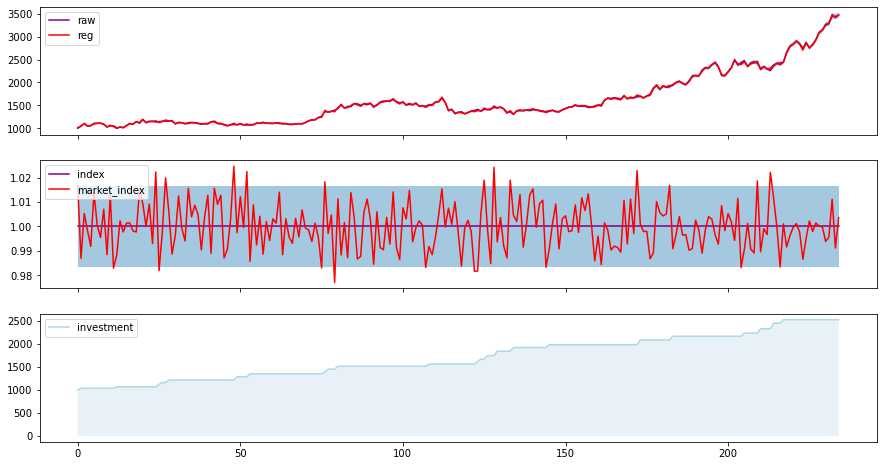

In [80]:
t = np.array(range(N))

fig, (usd_ax, ic_ax, inv_ax) = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(15, 8))

usd_ax.plot(t[:N], raw_index, label='raw',color='purple') 
usd_ax.plot(t[:N], mc_index, label='reg',color='red')      
usd_ax.fill_between(t[:N], lwr_thres, upr_thres, alpha=0.4)
legend = usd_ax.legend(loc='upper left');

ic_ax.plot(t[:N], mu, label='index',color='purple') 
ic_ax.plot(t[:N], mc, label='market_index',color='red')      
ic_ax.fill_between(t[:N], lwr_ithres, upr_ithres, alpha=0.4)
legend = ic_ax.legend(loc='upper left');

inv_ax.plot(t[:N], invest, label='investment',color='lightblue')  
inv_ax.fill_between(t[:N], np.zeros(N), invest, alpha=0.1)
legend = inv_ax.legend(loc='upper left');

#### Buybacks (collateral surplus) : MC shares burned

In [ ]:
Z = 200000  # MCS deposited to be burned
MC_rec = Pz*Z/Py
MC_rec

In [ ]:
np.random.normal(1, 0.01)

In [ ]:
USD = 1000
CR = 0.8
p_shares = 3.50
p_col = np.random.normal(1, 0.01)

coin = mintCoin(USD, CR, p_col, p_shares)


In [ ]:
CI = 0.50
predict_ci = predict.conf_int(alpha=1-0.6827)
sigmas = np.exp(predict_ci[2:, 1]) - np.exp(predict.predicted_mean[2:])
mu = np.exp(predict.predicted_mean[2:])
norm.ppf(0.975, loc=mu, scale=sigmas)
upr_thres = norm.ppf(1-(1-CI)/2, loc=mu, scale=sigmas)
lwr_thres = norm.ppf((1-CI)/2, loc=mu, scale=sigmas)
s = np.random.normal(mu, sigmas)
out = [s[k] < lwr_thres[k] or s[k] > upr_thres[k] for k in range(len(s))]

out_lwr = [s[k] < lwr_thres[k] for k in range(len(s))]
out_upr = [s[k] > lwr_thres[k] for k in range(len(s))]

y_price = y[2:]
n_units = 0.2
profits = 0
for k in range(len(s)):
    profits = profits + abs(n_units*s[k] - y_price[k]) if out[k] else profits
    if(out[k]): print('{} profit {}'.format(k, profits))

In [ ]:
np.random.normal(mu[0:2], sigmas[0:2])

In [ ]:
np.exp(predict_ci[2:, 1]) - np.exp(predict.predicted_mean[2:])

In [ ]:
np.exp(1.96*predict.se_mean)

In [ ]:
#dir(predict)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

t = np.array(range(len(sqrt_mc_investment)))

ax.plot(t, y, label=colnms[k],color='purple')      
ax.fill_between(dates, bot, btc_close, alpha=0.3, color='purple')

# Plot the results
#ax.plot(ax=ax, style='k.', label='Observations')
predict.predicted_mean.plot(ax=ax, label='One-step-ahead Prediction')
predict_ci = predict.conf_int(alpha=0.05)
predict_index = np.arange(len(predict_ci))
ax.fill_between(predict_index[2:], predict_ci.iloc[2:, 0], predict_ci.iloc[2:, 1], alpha=0.1)

# Cleanup the image
ax.set_ylim((4, 8));
legend = ax.legend(loc='lower left');